<a href="https://colab.research.google.com/github/DesiKeki/ML_Tutorial/blob/master/MNIST_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Image Recognition Model Creation Example**



Import libs

In [ ]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook as tn

**Sample MNIST Data:**

---
`Image Source: www.medium.com`

![alt text](https://miro.medium.com/max/1200/1*VAjYygFUinnygIx9eVCrQQ.png)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

**Load training data**

In [ ]:
#Training and test data for MNIST is part of Google Collab's sample_data folder

#Read the train CSV file in Pandas DataFrame
df_train = pd.read_csv("sample_data/mnist_train_small.csv")

#Check the shape and first 5 rows of data
print(df_train.shape)
df_train.head()

(19999, 785)


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Segregate the training Features and Labels
X_train = df_train.iloc[:, 1:] #Features
y_train = df_train.iloc[:, 0]  #Labels

Load test data

In [ ]:
#Read the test CSV file in Pandas DataFrame
df_test = pd.read_csv("sample_data/mnist_test.csv")
print(df_test.shape)
df_test.head()

(9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Segregate the test Features and Labels
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

Lets visualize our data sample. 5th image in training data (it is 2)

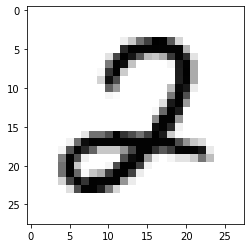

In [ ]:
s = X_train.iloc[4].values    #Gives the values of 5th tuple of the dataframe
s.shape = (28,28)             #Converts the tuple into a 2D array of 28X28
pt.imshow(255-s, cmap='gray') #pt comes from matplot lib imported above
pt.show()

Create and train the RF model

In [ ]:
#Random Forest Classifier comes from SciKit Learn Library imported above
rf_clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Lets try some sample predictions and check their accuracy manually:

In [ ]:
test_data_point = 23 #For checking a random (23rd) tuple/datapoint in our training data set
print("The RF model predicts this value to be:", rf_clf.predict([X_test.iloc[test_data_point]]))

The RF model predicts this value to be: [7]


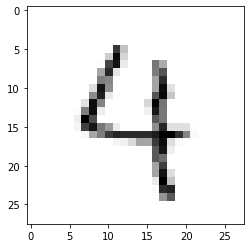

In [ ]:
#Let us check what is the actual test data point hand written digit
t = X_test.iloc[test_data_point].values
t.shape = (28,28)
pt.imshow(255-t, cmap='gray')
pt.show()

Let us now predict the results for complete test data set and check its accuracy by comparing predictions with acutal values

In [ ]:
#Get the predictions over complete test data set using RF Classifier
predictions = rf_clf.predict(X_test)

In [ ]:
#Compare predictions with actual values to get the accuracy of our model
actuals = y_test.values
result = (actuals==predictions)
correct_pred = 0
for r in result:
  if(r==True):
    correct_pred += 1

acc = round(100*correct_pred/9999, 2)
acc

62.43

Accuracy check using metrics library utility

In [ ]:
from sklearn import metrics
pscore = metrics.accuracy_score(y_test, predictions)
print("Random Forest Classifier Accuracy:", round(100*pscore, 2),"%")

Random Forest Classifier Accuracy: 62.43 %


**Classification using Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(gamma='auto', verbose=True)
sv_clf.fit(X_train, y_train) #Re-use the X_train and y_train created above

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = sv_clf.predict(X_test)

In [ ]:
pscore = metrics.accuracy_score(y_test, predictions)
print("Support Vector Classifier Accuracy:", round(100*pscore, 2),"%")

Support Vector Classifier Accuracy: 94.82 %


Gives a very poor accuracy of 11.35 %

**Classification using Dense Neural Network**

In [ ]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
i = 0
y_train_nn = pd.DataFrame()

#Insert 10 columns in the dataframe
for col in range(0,10):
  y_train_nn[col] = []

for label in tn(y_train):
  for k in range(0,10): #Initialize every row with Zeros
    y_train_nn.loc[i, k] = 0
  y_train_nn.loc[i, label] = 1
  i += 1

print(y_train_nn.shape)
y_train_nn.head()
  


(19999, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model.fit(X_train, y_train_nn, epochs=100, batch_size=64)

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
predictions = []
for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))
#print(predictions)

In [ ]:
pscore = metrics.accuracy_score(y_test, predictions)
print("Neural Network Model Accuracy:", round(100*pscore, 2),"%")

Neural Network Model Accuracy: 85.75 %


In [ ]:
TestX = np.array(X_test.iloc[test_data_point])[np.newaxis]
np.argmax(model.predict(TestX))

# **Can you try predicting the hand written digit using Logistic Regression?**

Hints:
1. You can use Logistic Regression algorithm from Scikit Learn

 -> from sklearn.linear_model import LogisticRegression

Free code for tutorial sponsored by **Yubo AI Labs**

If you liked the content and want more:

Give Yubo AI Labs a 5 star rating at: https://rb.gy/qsrkle

Follow Yubo on Linkedin for latest updates on AI: https://www.linkedin.com/company/hellooyubo/

Like and follow Yubo on FB: https://www.facebook.com/HelloYubo

